# Meta Methods applied to the ionosphere data set

In [6]:
# Import libraries 

import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

csv = "preprocessed.csv"

# Read the CSV file
df = pd.read_csv(csv, header=None, low_memory=False)

# Apply the decode function to convert bytes to strings if necessary
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Inspect the first few rows
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,wave,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,field,pref_o_attractive,...,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
1,1.0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,Law,35.0,...,0.14,3.0,2.0,4.0,7.0,6.0,0.0,1,0,0
2,1.0,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,Law,60.0,...,0.54,3.0,2.0,4.0,7.0,5.0,1.0,1,0,0
3,1.0,female,21.0,22.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,2.0,4.0,Law,19.0,...,0.16,3.0,2.0,4.0,7.0,NaN,1.0,1,1,1
4,1.0,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,2.0,4.0,Law,30.0,...,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1,1,1


In [7]:
# No preprocessing needed. Numerical and scaled data
# Separate data from labels

y=df[34].values
X=df.values[:,0:34]

## Voting scheme

In [8]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=50

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

TypeError: '<' not supported between instances of 'str' and 'float'

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.924 [Majority Voting]


In [5]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.928 [Weighted Voting]


## Bagging

In [6]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.856 [1]
Accuracy: 0.887 [2]
Accuracy: 0.903 [5]
Accuracy: 0.920 [10]
Accuracy: 0.919 [20]
Accuracy: 0.921 [50]
Accuracy: 0.925 [100]
Accuracy: 0.922 [200]

Accuracy: 0.828 [1]
Accuracy: 0.843 [2]
Accuracy: 0.918 [5]
Accuracy: 0.917 [10]
Accuracy: 0.931 [20]
Accuracy: 0.940 [50]
Accuracy: 0.938 [100]
Accuracy: 0.939 [200]


## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.906 [1]
Accuracy: 0.867 [2]
Accuracy: 0.907 [5]
Accuracy: 0.937 [10]
Accuracy: 0.934 [20]
Accuracy: 0.940 [50]
Accuracy: 0.943 [100]
Accuracy: 0.940 [200]


In [8]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.885 [1]
Accuracy: 0.874 [2]
Accuracy: 0.908 [5]
Accuracy: 0.943 [10]
Accuracy: 0.947 [20]
Accuracy: 0.944 [50]
Accuracy: 0.945 [100]
Accuracy: 0.948 [200]


## Boosting

In [9]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.821 [1]
Accuracy: 0.896 [2]
Accuracy: 0.906 [5]
Accuracy: 0.911 [10]
Accuracy: 0.917 [20]
Accuracy: 0.947 [50]
Accuracy: 0.942 [100]
Accuracy: 0.937 [200]


In [10]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.865 [1]
Accuracy: 0.890 [2]
Accuracy: 0.886 [5]
Accuracy: 0.908 [10]
Accuracy: 0.935 [20]
Accuracy: 0.937 [50]
Accuracy: 0.943 [100]
Accuracy: 0.943 [200]


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.644 [1]
Accuracy: 0.644 [2]
Accuracy: 0.873 [5]
Accuracy: 0.908 [10]
Accuracy: 0.926 [20]
Accuracy: 0.932 [50]
Accuracy: 0.939 [100]
Accuracy: 0.947 [200]


In [12]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

<Figure size 1200x600 with 1 Axes>

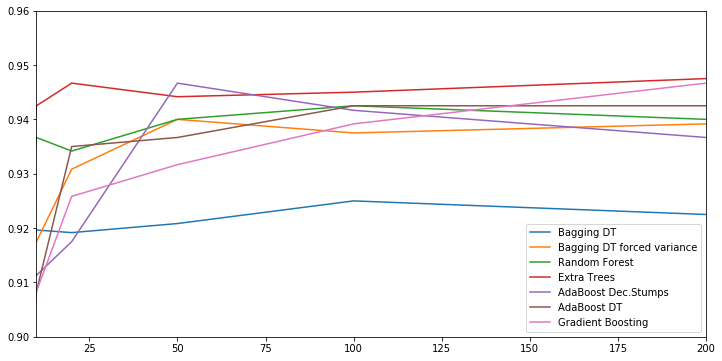

In [13]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.90,0.96)
plt.show()

## Feature Selection with Forests of trees

In [26]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  


[0.04422916 0.         0.10285554 0.03938437 0.13854779 0.03438844
 0.07349033 0.04057574 0.01605075 0.02358326 0.00710961 0.02016928
 0.01164509 0.03679133 0.01039527 0.0259479  0.01059528 0.02249814
 0.00921494 0.01098243 0.01117065 0.02225948 0.0118677  0.02795004
 0.01172796 0.0104431  0.07498322 0.02083322 0.03011737 0.01092428
 0.02508491 0.01125834 0.03057428 0.02235078]


In [27]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(351, 4)
0.8441666666666666
0.8883333333333334


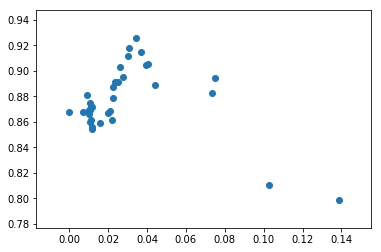

Best threshold:  0.034388438772079095


In [30]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [33]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))

(351, 9)
Original:  0.8675000000000002
With FS:  0.9258333333333333
